In [1]:
from api.models import *

In [2]:
from django.db.models import Subquery, OuterRef, F, Q
    

In [3]:
PostsWords.objects.filter(date__isnull=True).update(date=Subquery(PostsWords.objects.filter(pk=OuterRef('pk')).values('post__date__date')[:1]))

0

In [2]:
import pandas as pd
df = pd.DataFrame(list(PostsWords.objects.filter(word__iexact='украина').values()))
df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d')

In [3]:
df.dtypes

id                  int64
word               object
post_id             int64
date       datetime64[ns]
count               int64
dtype: object

In [4]:
df.head

<bound method NDFrame.head of             id     word  post_id       date  count
0         4987  украина     2884 2022-02-13      1
1      1598117  украина    95307 2020-03-27      1
2      3477707  украина   300968 2021-02-16      1
3      2465486  украина   165527 2021-09-22      1
4      2928176  украина   202031 2022-05-15      1
...        ...      ...      ...        ...    ...
18877     1181  украина   150195 2018-04-05      1
18878      252  украина   150285 2018-04-04      1
18879      548  украина   150257 2018-04-05      1
18880      998  украина   150209 2018-04-05      1
18881     1415  украина   150175 2018-04-05      1

[18882 rows x 5 columns]>

In [5]:
grouped = df.groupby(['date'])

In [6]:
grouped.head

<bound method GroupBy.head of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x000001CE94B11B20>>

In [7]:
grouped.mean().head(10)

,id,post_id,count
date,,,
2017-01-02,4.423736e+06,400406.000000,1.0
2017-01-03,4.900155e+06,400350.500000,1.0
2017-01-05,3.944588e+06,400127.500000,1.0
2017-01-10,4.314645e+06,399442.000000,1.0
2017-01-11,5.124019e+06,399351.000000,1.0
2017-01-12,3.974041e+06,399252.666667,1.0
2017-01-15,4.347963e+06,398907.000000,1.0
2017-01-16,3.550936e+06,398724.500000,1.0
2017-01-17,3.868723e+06,398578.000000,1.0


In [8]:
grouped.head(10)

,id,word,post_id,date,count
0,4987,украина,2884,2022-02-13,1
1,1598117,украина,95307,2020-03-27,1
2,3477707,украина,300968,2021-02-16,1
3,2465486,украина,165527,2021-09-22,1
4,2928176,украина,202031,2022-05-15,1
...,...,...,...,...,...
18877,1181,украина,150195,2018-04-05,1
18878,252,украина,150285,2018-04-04,1
18879,548,украина,150257,2018-04-05,1
18880,998,украина,150209,2018-04-05,1


In [9]:
grouped.sum().head(10)

,id,post_id,count
date,,,
2017-01-02,4423736,400406,1
2017-01-03,9800310,800701,2
2017-01-05,7889177,800255,2
2017-01-10,4314645,399442,1
2017-01-11,5124019,399351,1
2017-01-12,11922124,1197758,3
2017-01-15,4347963,398907,1
2017-01-16,7101872,797449,2
2017-01-17,3868723,398578,1


<AxesSubplot:xlabel='date'>

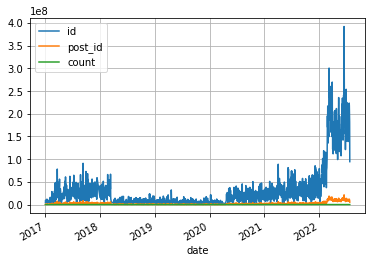

In [10]:
grouped.sum().plot(grid=True)

In [11]:
matplotlib.rcParams['figurefigsize'] = [20.0, 12.0]

NameError: name 'matplotlib' is not defined

In [12]:
import matplotlib
matplotlib.rcParams['figurefigsize'] = [20.0, 12.0]

KeyError: 'figurefigsize is not a valid rc parameter (see rcParams.keys() for a list of valid parameters)'

In [13]:
matplotlib.rcParams['figure.figsize'] = [20.0, 12.0]

<AxesSubplot:xlabel='date'>

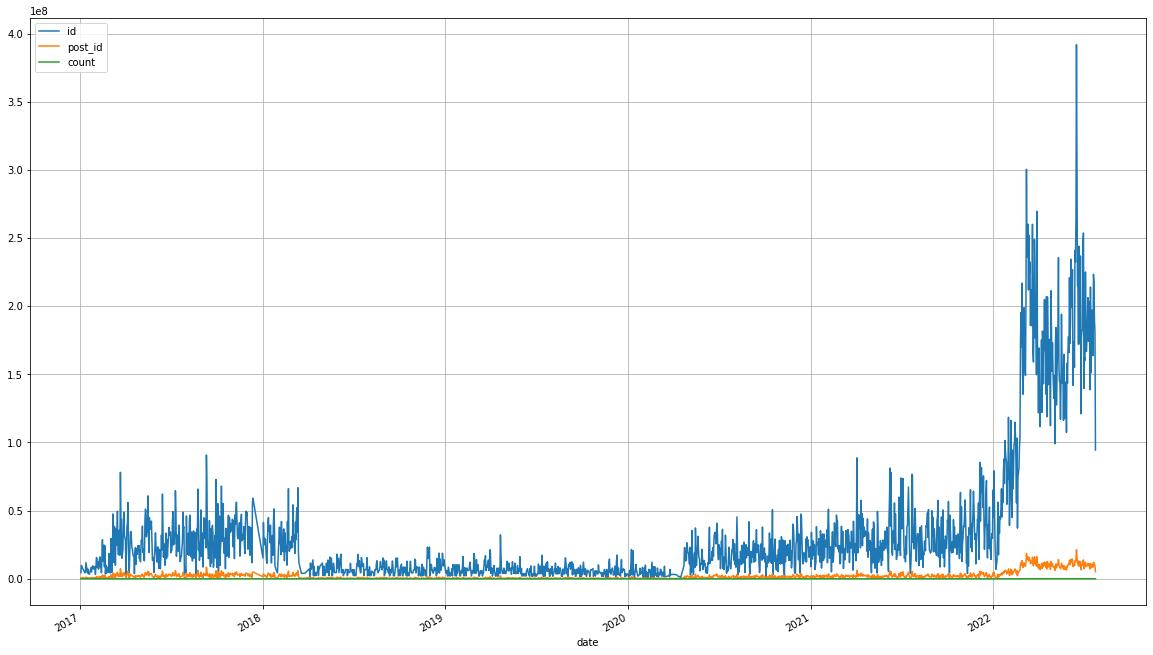

In [14]:
grouped.sum().plot(grid=True)